# Not using...

In [20]:
import time
import os
import platform, subprocess

SPACE = ' '
LINUXVIDEOPATH = '/dev/video0' # ffplay
DEBUG = 0

class mycamera():
    def __init__(self, duration=3, fps=60):
        self.connection = True
        
        # Camera Parameters
        self.DEVICE_ID = 1
        self.WIDTH = 1280
        self.HEIGHT = 720
        self.FPS = fps
        self.FRAMERATE = fps
        self.counter = 0 # used in the fileName
        self.fileName =  ""
        self.readablefileName = ''
        self.VIDEOSIZE = "1280x720"
        self.DURATION = duration
        self.client = ""
        self.photoform = '%01d.png' # what we need is 2.png
        
        
    
    def take_picture(self, isUsingCounter=True, appendix='', folder=''):
        # we don't need this
        # Allright, we need this 
        self.counter += 1
        if isUsingCounter:
            self.fileName = time.strftime("%Y_%m_%d_%H_%M_%S_No", time.localtime()) + str(self.counter)
            if appendix:
                self.fileName += "_" + appendix + self.photoform
            else:
                self.fileName += self.photoform
        else:
            self.fileName = time.strftime("%Y_%m_%d_%H_%M_%S", time.localtime()) 
            if appendix:
                self.fileName += "_" + appendix + self.photoform
            else:
                self.fileName += self.photoform
        if DEBUG == 2:
            print("Filename is {}".format(self.fileName))
            return
        if folder:
            folderPath = "image_analysis/{}/".format(folder)
            if not os.path.exists(folderPath):
                try:
                    os.mkdir(folderPath)
                except Exception as e:
                    print(e)
        if not folder:
            self.fileName = "image_analysis/temp/{}".format(self.fileName)
        else:
            self.fileName = folderPath + self.fileName
        
        self.readablefileName = self.fileName[:-8] + '2.png'
        

        if os.path.exists(self.fileName):
            raise Exception("Same File!")
        if "Linux" in platform.platform():
            # Remember to check the path everytime.
            videoPath = LINUXVIDEOPATH
            fParam = "v4l2"
            videoTypeParm = "-input_format"
        elif "Windows" in platform.platform():
            videoPath = "video='C922 Pro Stream Webcam'"
            fParam = "dshow" 
            videoTypeParm = "-vcodec"

        # only the command is different from take_video
        command = "ffmpeg -f {} -i {} -vframes 2 {}".format(
            fParam, 
            videoPath, 
            self.fileName)
        print(command)
        # ffmpeg -f v4l2 -i /dev/video2 -vframes 1 /home/dongagent/github/CameraControl/algorithm/test.png

        if "Linux" in platform.platform():
            # Linux
            return subprocess.Popen([command], stdout=subprocess.PIPE, shell=True)
        elif "Windows" in platform.platform():
            # Windows
            return subprocess.Popen(["pwsh", "-Command", command], stdout=subprocess.PIPE)

In [22]:
cameraa = mycamera()
process = cameraa.take_picture()
process.wait()


ffmpeg -f v4l2 -i /dev/video0 -vframes 2 image_analysis/temp/2022_12_09_02_25_07_No1%01d.png


0

# Get the gd face box

/home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/nilearn/datasets/__init__.py:96: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)
/home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0
/home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator PCA from version 0.24.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own r

Loading Face Detection model:  retinaface
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/mobilenet0.25_Final.pth
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/mobilefacenet_model_best.pth.tar
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/py_feat-0.3.7-py3.7.egg/feat/resources/hog_scalar_aus.joblib
Using downloaded and verified file: /home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site

/home/dongagent/anaconda3/envs/py37pyfeat1/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


Loading emotion model:  resmasknet
[525.60693, 319.62982, 701.2994, 542.67755, 0.9992099]
start_x, start_y, end_x, end_y = 504, 322, 721, 539


(-0.5, 216.5, 216.5, -0.5)

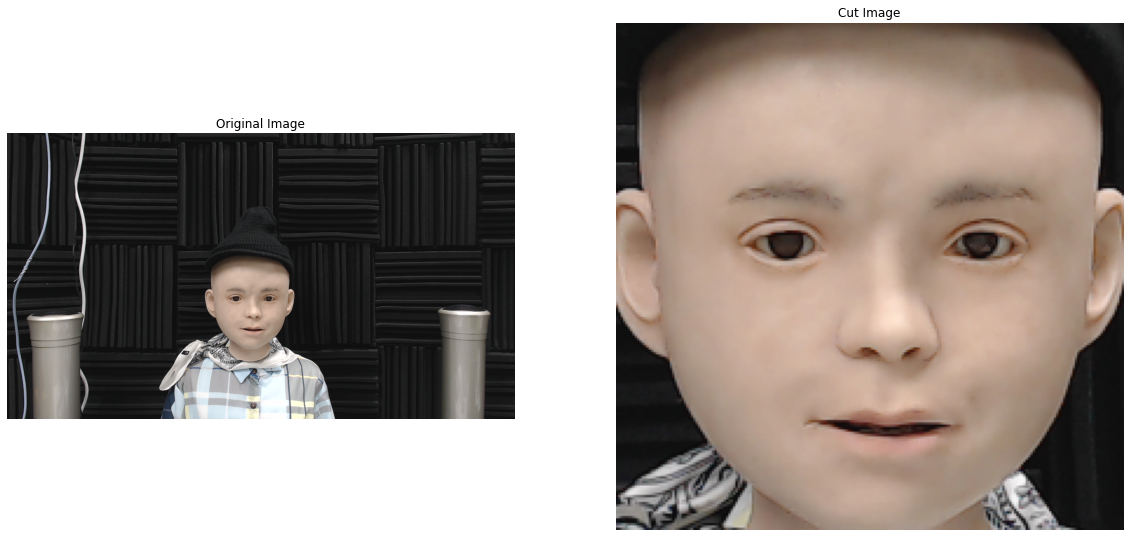

In [1]:
import cv2
import numpy as np
from feat import Detector
from PIL import Image
import matplotlib.pyplot as plt
detector = Detector(landmark_model='mobilefacenet')
def get_box(start_x, start_y, end_x, end_y):
    center_x, center_y = (start_x + end_x) // 2, (start_y + end_y) // 2
    square_length = ((end_x - start_x) + (end_y - start_y)) // 2 // 2
    square_length *= 1.1
    start_x = int(center_x - square_length)
    start_y = int(center_y - square_length)
    end_x = int(center_x + square_length)
    end_y = int(center_y + square_length)
    return start_x, start_y, end_x, end_y
def ensure_color(image):
    if len(image.shape) == 2:
        return np.dstack([image] * 3)
    elif image.shape[2] == 1:
        return np.dstack([image] * 3)
    return image


testframe = cv2.imread('image_analysis/test/2024_11_13_14_23_33_disgust_test.png')


facebox = detector.detect_faces(testframe)[0]
print(facebox)
start_x, start_y, end_x, end_y = get_box(facebox[0], facebox[1], facebox[2], facebox[3])
print(f'start_x, start_y, end_x, end_y = {start_x}, {start_y}, {end_x}, {end_y}')
523, 258, 748, 483
504, 322, 721, 539
# 193, 111, 448, 366


# Display the original and cropped images side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
# Original image
b,g,r = cv2.split(testframe)
frame_rgb = cv2.merge((r,g,b))
axes[0].imshow(frame_rgb)
axes[0].set_title("Original Image")
axes[0].axis("off")
# # Cropped image
# axes[1].imshow(face)
# axes[1].set_title("Cropped Image")
# axes[1].axis("off")

# cv2.resize()

face = testframe[start_y:end_y, start_x:end_x]
face = ensure_color(face)
b,g,r = cv2.split(face)
face_rgb = cv2.merge((r,g,b))
axes[1].imshow(face_rgb)
axes[1].set_title("Cut Image")
axes[1].axis("off")


In [3]:
h, w

(480, 640)

(1280, 720)


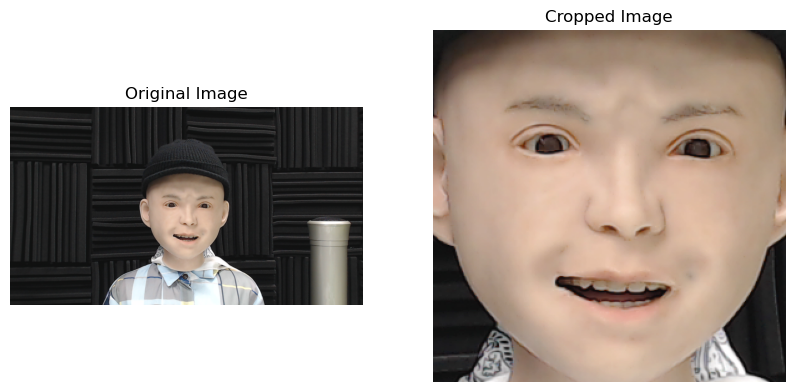

In [7]:
# figure xyhw
from PIL import Image
import matplotlib.pyplot as plt

# Open the image (assuming 'frame' is the original image as a PIL Image)
frame = Image.open('image_analysis/anger/2024_11_21_10_22_30_anger_10.png')  # Uncomment if you need to load the image
print(frame.size)

def get_box(start_x, start_y, end_x, end_y):
    center_x, center_y = (start_x + end_x) // 2, (start_y + end_y) // 2
    square_length = ((end_x - start_x) + (end_y - start_y)) // 2 // 2
    square_length *= 1.1
    start_x = int(center_x - square_length)
    start_y = int(center_y - square_length)
    end_x = int(center_x + square_length)
    end_y = int(center_y + square_length)
    return start_x, start_y, end_x, end_y

# Crop coordinates
# ----------- EDIT HERE -------------
# ***********************************
start_x, start_y, end_x, end_y = 515.1966,270,756.4444,547.034
# FaceRectX ,FaceRectY ,FaceRectWidth ,FaceRectHeight = 510.6048,239.38774,257.56793,312.7223
# start_x = FaceRectX
# end_x = FaceRectX + FaceRectWidth
# start_y = FaceRectY
# end_y = FaceRectY + FaceRectHeight
# print(start_x, start_y, end_x, end_y)
start_x, start_y, end_x, end_y = get_box(start_x, start_y, end_x, end_y)

# ***********************************
# ----------- EDIT HERE -------------



# Crop the image
face = frame.crop((start_x, start_y, end_x, end_y))

# Display the original and cropped images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# Original image
axes[0].imshow(frame)
axes[0].set_title("Original Image")
axes[0].axis("off")
# Cropped image
axes[1].imshow(face)
axes[1].set_title("Cropped Image")
axes[1].axis("off")

# Show the plots
plt.show()

/home/dongagent/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


(1280, 720)
   Unnamed: 0     anger   disgust      fear  happiness   sadness  surprise  \
0           0  0.002646  0.006249  0.001569   0.846744  0.001827  0.115068   

    neutral                                              input   start_x  \
0  0.025897  image_analysis/anger/2024_11_21_09_30_24_anger...  510.9312   

   start_y    end_x     end_y  
0      270  765.459  545.9011  
510.9312 
 270.0 
 765.459 
 545.9011
492.0 
 261.0 
 783.0 
 552.0


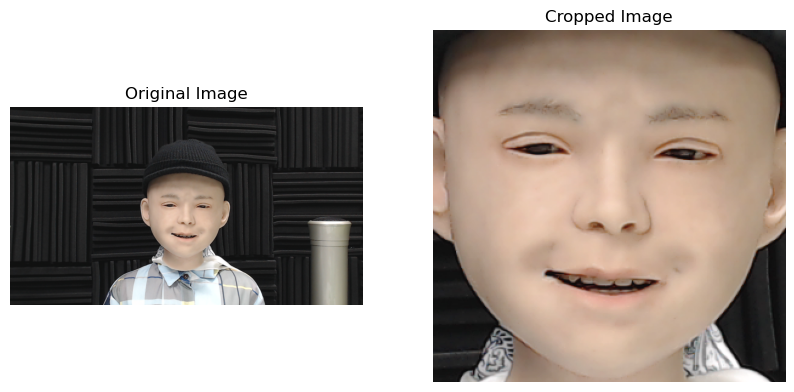

In [1]:
# crop fig version 2
# figure xyhw
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

# Open the image (assuming 'frame' is the original image as a PIL Image)
image_path = 'image_analysis/anger/2024_11_21_09_30_24_anger_1.png'
frame = Image.open(image_path)  # Uncomment if you need to load the image
print(frame.size)

# Crop coordinates
# ----------- EDIT HERE -------------
# ***********************************
box_data = pd.read_csv(image_path[:-4] + '_rmn_emotion.csv')
print(box_data)

start_x, start_y, end_x, end_y = box_data['start_x'], box_data['start_y'], box_data['end_x'], box_data['end_y']
# start_y = 270
print(float(start_x), '\n', float(start_y), '\n', float(end_x), '\n', float(end_y))
def get_box(start_x, start_y, end_x, end_y):
    center_x, center_y = (start_x + end_x) // 2, (start_y + end_y) // 2
    square_length = ((end_x - start_x) + (end_y - start_y)) // 2 // 2
    square_length *= 1.1
    start_x = int(center_x - square_length)
    start_y = int(center_y - square_length)
    end_x = int(center_x + square_length)
    end_y = int(center_y + square_length)
    return start_x, start_y, end_x, end_y


start_x, start_y, end_x, end_y = get_box(start_x, start_y, end_x, end_y)
print(float(start_x), '\n', float(start_y), '\n', float(end_x), '\n', float(end_y))

# ***********************************
# ----------- EDIT HERE -------------

# Crop the image
face = frame.crop((start_x, start_y, end_x, end_y))

# Display the original and cropped images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# Original image
axes[0].imshow(frame)
axes[0].set_title("Original Image")
axes[0].axis("off")
# Cropped image
axes[1].imshow(face)
axes[1].set_title("Cropped Image")
axes[1].axis("off")

# Show the plots
plt.show()

(1280, 720)
   Unnamed: 0    anger   disgust      fear  happiness   sadness  surprise  \
0           0  0.09465  0.149878  0.123279   0.194837  0.167583  0.188193   

    neutral                                              input    start_x  \
0  0.081579  image_analysis/anger/2024_11_17_18_06_52_anger...  469.80994   

   start_y     end_x     end_y  
0      270  689.6704  530.1695  
469.80994 
 270.0 
 689.6704 
 530.1695
447.0 
 268.0 
 711.0 
 532.0


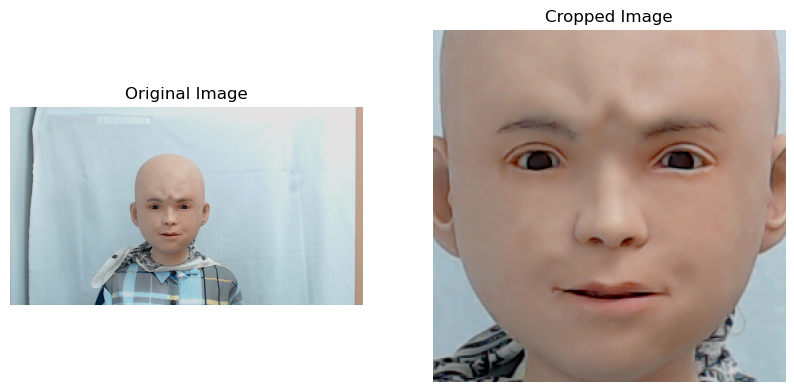

In [3]:
# crop fig version 2
# figure xyhw
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

# Open the image (assuming 'frame' is the original image as a PIL Image)
image_path = 'image_analysis/241117Exp26/anger/2024_11_17_18_06_52_anger_19.png'
frame = Image.open(image_path)  # Uncomment if you need to load the image
print(frame.size)

# Crop coordinates
# ----------- EDIT HERE -------------
# ***********************************
box_data = pd.read_csv(image_path[:-4] + '_intensitynet.csv')
print(box_data)

start_x, start_y, end_x, end_y = box_data['start_x'], box_data['start_y'], box_data['end_x'], box_data['end_y']
# start_y = 270
print(float(start_x), '\n', float(start_y), '\n', float(end_x), '\n', float(end_y))
def get_box(start_x, start_y, end_x, end_y):
    center_x, center_y = (start_x + end_x) // 2, (start_y + end_y) // 2
    square_length = ((end_x - start_x) + (end_y - start_y)) // 2 // 2
    square_length *= 1.1
    start_x = int(center_x - square_length)
    start_y = int(center_y - square_length)
    end_x = int(center_x + square_length)
    end_y = int(center_y + square_length)
    return start_x, start_y, end_x, end_y


start_x, start_y, end_x, end_y = get_box(start_x, start_y, end_x, end_y)
print(float(start_x), '\n', float(start_y), '\n', float(end_x), '\n', float(end_y))

# ***********************************
# ----------- EDIT HERE -------------

# Crop the image
face = frame.crop((start_x, start_y, end_x, end_y))

# Display the original and cropped images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# Original image
axes[0].imshow(frame)
axes[0].set_title("Original Image")
axes[0].axis("off")
# Cropped image
axes[1].imshow(face)
axes[1].set_title("Cropped Image")
axes[1].axis("off")

# Show the plots
plt.show()

In [ ]:
[470.79187, 236.21378, 689.58936, 531.63904, 0.9997795]

In [ ]:
[481.82327, 231.2516, 703.5406, 528.3568, 0.9997894]
[480.437, 232.03015, 703.8462, 526.7545, 0.9997961]
[481.1887, 232.37494, 703.8784, 526.13086, 0.99977225]